In [17]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt


In [46]:
school_data = pd.read_csv("C:/Users/Sddhraj/Downloads/Pune-D22A-SchoolEnrollmentDetails_0.csv")

In [47]:
school_data.head()

,Dise No.,Rural / Urban,Year,Block Code,Block Name,Village Code,Village Name,Zonal Office,CRC Code,CRC No.,...,6_8 Total,1_8 Boys,1_8 Girls,1_8 Total,9_12 Boys,9_12 Girls,9_12 Total,1_12 Boys,1_12 Girls,1_12 Total
0,27251400101,Urban,2012-13,272514,Aundh,272514001,AUNDH GAON,Aundh,2725140001,Aundh CRC No. 1,...,0,120,128,248,0,0,0,120,128,248
1,27251400102,Urban,2012-13,272514,Aundh,272514001,AUNDH GAON,Aundh,2725140001,Aundh CRC No. 1,...,125,0,296,296,0,0,0,0,296,296
2,27251400103,Urban,2012-13,272514,Aundh,272514001,AUNDH GAON,Aundh,2725140001,Aundh CRC No. 1,...,111,283,0,283,0,0,0,283,0,283
3,27251400104,Urban,2012-13,272514,Aundh,272514001,AUNDH GAON,Aundh,2725140001,Aundh CRC No. 1,...,0,34,34,68,0,0,0,34,34,68
4,27251400105,Urban,2012-13,272514,Aundh,272514001,AUNDH GAON,Aundh,2725140001,Aundh CRC No. 1,...,0,78,79,157,0,0,0,78,79,157


In [48]:
dataset=school_data[["Rural / Urban","Village Name","School Name","Medium","School Status","Category Code","Category Name","School Type Code","School Type Name"]]

In [49]:
dataset.head()

,Rural / Urban,Village Name,School Name,Medium,School Status,Category Code,Category Name,School Type Code,School Type Name
0,Urban,AUNDH GAON,P. M. C. 54 B,Marathi,Operational,1,Primary,3,Co-Education
1,Urban,AUNDH GAON,P. M. C. 42 G,Marathi,Operational,2,Primary with Upper Primary,2,Girls
2,Urban,AUNDH GAON,P. M. C. 87 B,Marathi,Operational,2,Primary with Upper Primary,1,Boys
3,Urban,AUNDH GAON,PMC 54 B ENG,English,Operational,1,Primary,3,Co-Education
4,Urban,AUNDH GAON,RAYAT SHIKSHAN SANSTHA PRI.,Marathi,Operational,1,Primary,3,Co-Education


In [50]:
dataset.shape

(6077, 9)

In [51]:
dataset.describe()

,Category Code,School Type Code
count,6077.000000,6077.000000
mean,3.824420,2.878723
std,3.011161,0.422698
min,1.000000,0.000000
25%,2.000000,3.000000
50%,2.000000,3.000000
75%,7.000000,3.000000
max,11.000000,9.000000


In [52]:
dataset.columns

Index(['Rural / Urban', 'Village Name', 'School Name', 'Medium',
       'School Status', 'Category Code', 'Category Name', 'School Type Code',
       'School Type Name'],
      dtype='object')

In [53]:
dataset = dataset.rename(columns={"Rural / Urban":"Rural_Urban","Village Name":"Area", "School Name":"School_Name",
       'School Status':"School_Status", "Category Code":"Category_Code", "Category Name":"Category_Name", "School Type Code":"School_Type_Code",
       "School Type Name":"School_Type_Name"})

df[df.name != 'Tina']

In [54]:
dataset.columns

Index(['Rural_Urban', 'Area', 'School_Name', 'Medium', 'School_Status',
       'Category_Code', 'Category_Name', 'School_Type_Code',
       'School_Type_Name'],
      dtype='object')

In [55]:
dataset['School_Type_Code'].value_counts()

3    5530
2     350
1     195
9       1
0       1
Name: School_Type_Code, dtype: int64

Here 0 and 9 are missing values so we will remove the rows which have 0 and 9 in School Type code

In [58]:
dataset = dataset[dataset.School_Type_Code != 9]
dataset = dataset[dataset.School_Type_Code != 0]

In [60]:
dataset['School_Type_Code'].value_counts()

3    5530
2     350
1     195
Name: School_Type_Code, dtype: int64

In [61]:
dataset['School_Status'].value_counts()

Operational    5971
Closed           72
Merged           32
Name: School_Status, dtype: int64

WE will look into schools those are in operational and exclude Closed and Merged

In [62]:
dataset = dataset[dataset.School_Status != "Merged"]

In [63]:
dataset = dataset[dataset.School_Status != "Closed"]

In [64]:
dataset['School_Status'].value_counts()

Operational    5971
Name: School_Status, dtype: int64

Therefore we can see there are 5971 schools which are operational 

we will just see which area has how many operational schools

In [65]:
dataset['Area'].value_counts()

KATRAJ                     250
DHANORI                    210
MITHA NAGAR                193
POPULARNAGAR WARJE         160
PRABHAT ROAD               152
KALEPADAL MOHAMMADWADI     150
K.E.M. HOSPITAL            131
KHARADI                    130
HADPASAR GAVTHAN           125
RAILWAY STATION            119
SUTARWADI PASHAN           117
KONDHAWA BK                114
KOREGAON PARK              114
TILAKROAD LOKMANYA NAG     114
W. S. SAINATHNAGAR         111
AAMBEGAON PATHAR           109
HINGNE S. S. SANSTHA       108
RAUTBAUG DHANKAWADI        106
SINHAGAD INST. WADGAON     102
WADGAON DHAYARI            101
VISHRANT WADI               98
GOKHALE NAGAR               96
NAGPUR CHAWL                94
NARAYAN PETH NANA WADA      94
K K MARKET                  91
SADHANA VIDYALAY            89
W. S. AADARSHNAGAR          86
HARKA NAGAR RAJEWADI        83
CITY POST GADIKHANA         81
SALISBURY PARK              79
                          ... 
ST WORKSHOP                 60
D. MANGE

In [66]:
dataset["Medium"].value_counts()

Marathi     3060
English     2492
Urdu         339
Hindi         39
Gujarati      20
Kannada       16
Tamil          5
Name: Medium, dtype: int64

Now we will convert categorical variables 'Medium' and 'School Type Name'. For this we will use LabelEncoder.

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
le = LabelEncoder()

In [70]:
dataset["Medium"] = le.fit_transform(dataset["Medium"])

In [71]:
dataset["Medium"].value_counts()

4    3060
0    2492
6     339
2      39
1      20
3      16
5       5
Name: Medium, dtype: int64

In [72]:
dataset["School_Type_Code"].value_counts()

3    5435
2     346
1     190
Name: School_Type_Code, dtype: int64

In [75]:
dataset.to_csv('processed_school_data.csv')

In [79]:
dataset.groupby("Medium").groups

{0: Int64Index([   3,    5,    6,    7,    8,    9,   19,   20,   21,   22,
             ...
             6061, 6062, 6069, 6070, 6071, 6072, 6073, 6074, 6075, 6076],
            dtype='int64', length=2492),
 1: Int64Index([1006, 1007, 1081, 1082, 2195, 2196, 2271, 2272, 3422, 3423, 3494,
             3495, 4652, 4653, 4726, 4727, 5898, 5899, 5972, 5973],
            dtype='int64'),
 2: Int64Index([ 375,  502,  508, 1016, 1019, 1022, 1060, 1061, 1679, 2204, 2206,
             2207, 2210, 2248, 2249, 2756, 2883, 3431, 3433, 3434, 3437, 3472,
             3473, 3984, 4110, 4662, 4664, 4665, 4668, 4704, 4705, 5226, 5352,
             5908, 5910, 5911, 5914, 5950, 5951],
            dtype='int64'),
 3: Int64Index([ 145,  204, 1149, 1328, 1388, 2340, 2521, 2581, 3563, 3746, 3805,
             3893, 4796, 4985, 5045, 6043],
            dtype='int64'),
 4: Int64Index([   0,    1,    2,    4,   10,   12,   13,   14,   15,   16,
             ...
             6044, 6045, 6046, 6047, 6063, 6064, 

grouped = dataset.groupby('Medium')

eng_schools = grouped.get_group(0)

count_eng = eng_schools["Area"].value_counts()

In [3]:
dataset = pd.read_csv("processed_school_data.csv")

In [4]:
dataset.head()

,Unnamed: 0,Rural_Urban,Area,School_Name,Medium,School_Status,Category_Code,Category_Name,School_Type_Code,School_Type_Name
0,0,Urban,AUNDH GAON,P. M. C. 54 B,4,Operational,1,Primary,3,Co-Education
1,1,Urban,AUNDH GAON,P. M. C. 42 G,4,Operational,2,Primary with Upper Primary,2,Girls
2,2,Urban,AUNDH GAON,P. M. C. 87 B,4,Operational,2,Primary with Upper Primary,1,Boys
3,3,Urban,AUNDH GAON,PMC 54 B ENG,0,Operational,1,Primary,3,Co-Education
4,4,Urban,AUNDH GAON,RAYAT SHIKSHAN SANSTHA PRI.,4,Operational,1,Primary,3,Co-Education


In [5]:
grouped = dataset.groupby('Medium')

---

In [6]:
eng_schools = grouped.get_group(0)

In [7]:
df_eng = eng_schools["Area"].value_counts()

In [8]:
df_eng = df_eng.to_frame().reset_index().rename(columns={"Area":"no. of Schools","index":"Area"})

In [25]:
top_df_eng = df_eng.head()

In [26]:
top_df_eng

,Area,no. of Schools
0,DHANORI,110
1,MITHA NAGAR,106
2,KATRAJ,92
3,POPULARNAGAR WARJE,89
4,RAILWAY STATION,78


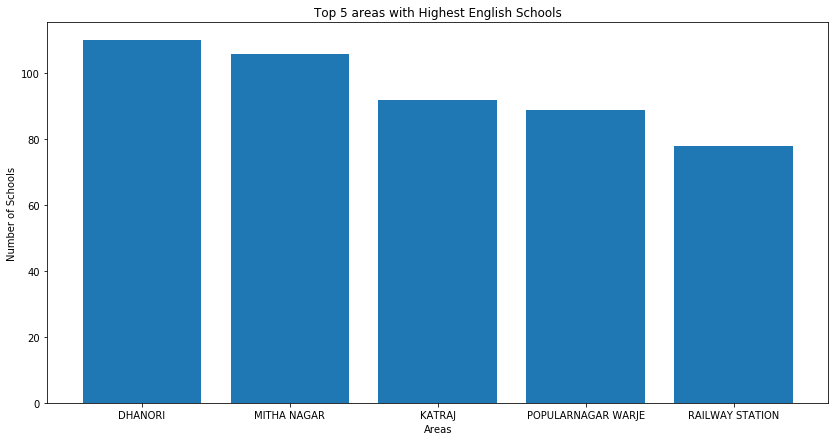

In [37]:
plt.figure(figsize=(14,7))
plt.bar(top_df_eng["Area"],top_df_eng["no. of Schools"])
plt.title("Top 5 areas with Highest English Schools")
plt.xlabel("Areas")
plt.ylabel("Number of Schools")
plt.savefig('English_schools.png')

---

In [10]:
guj_schools = grouped.get_group(1)

In [39]:
df_guj = guj_schools["Area"].value_counts()
df_guj = df_guj.to_frame().reset_index().rename(columns={"Area":"no. of Schools","index":"Area"})

In [52]:
df_guj

,Area,no. of Schools
0,CITY POST GADIKHANA,10
1,KASBA GANPATI,10


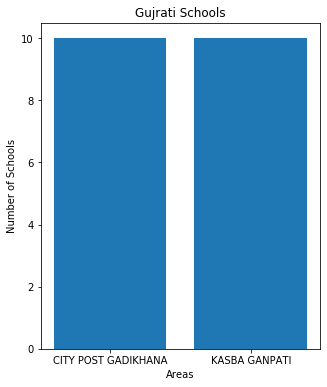

In [58]:
plt.figure(figsize=(5,6))
plt.bar(df_guj["Area"],df_guj["no. of Schools"])
plt.title("Gujrati Schools")
plt.xlabel("Areas")
plt.ylabel("Number of Schools")
plt.savefig('Gujrati_schools.png')

------------------------

In [42]:
hindi_schools = grouped.get_group(2)
df_hindi = hindi_schools["Area"].value_counts()
df_hindi = df_hindi.to_frame().reset_index().rename(columns={"Area":"no. of Schools","index":"Area"})

In [43]:
df_hindi

,Area,no. of Schools
0,DOKE TALIM RAMOSHI GATE,19
1,HARKA NAGAR RAJEWADI,10
2,W. S. SAINATHNAGAR,6
3,KOREGAON PARK,4


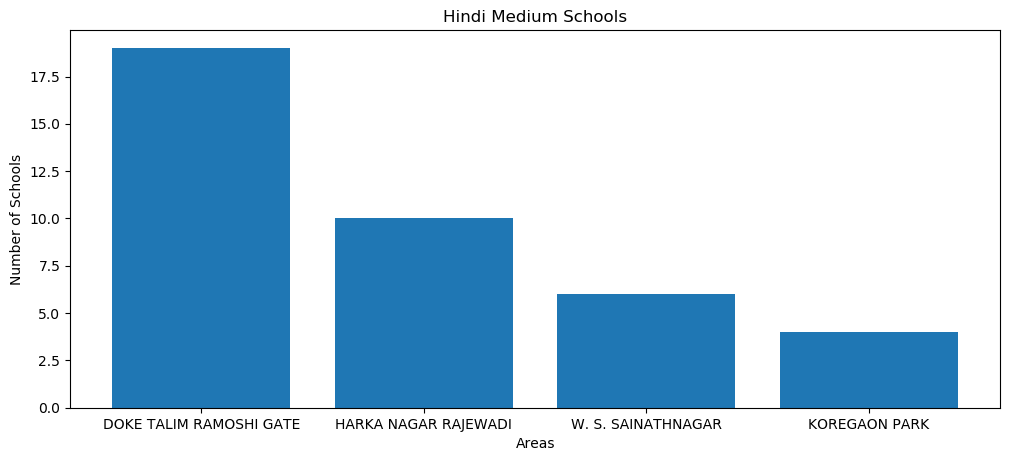

In [69]:
plt.figure(figsize=(12,5), dpi = 100)
plt.bar(df_hindi["Area"],df_hindi["no. of Schools"])
plt.title("Hindi Medium Schools")
plt.xlabel("Areas")
plt.ylabel("Number of Schools")
plt.savefig('Hindi_schools.png')

-------------

In [44]:
kan_schools = grouped.get_group(3)
df_kan = kan_schools["Area"].value_counts()
df_kan = df_kan.to_frame().reset_index().rename(columns={"Area":"no. of Schools","index":"Area"})

In [45]:
df_kan

,Area,no. of Schools
0,PANDAVNAGAR,5
1,PRABHAT ROAD,5
2,RAILWAY STATION,5
3,BOPODI,1


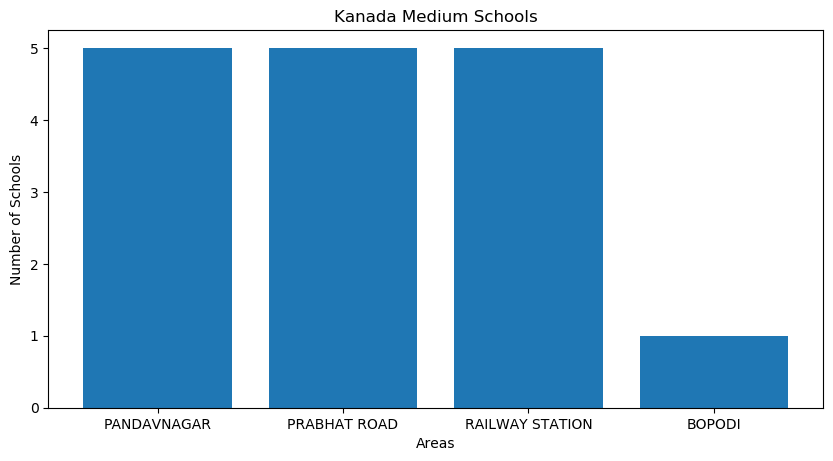

In [68]:
plt.figure(figsize=(10,5), dpi = 100)
plt.bar(df_kan["Area"],df_kan["no. of Schools"])
plt.title("Kanada Medium Schools")
plt.xlabel("Areas")
plt.ylabel("Number of Schools")
plt.savefig('Kanada_schools.png')

---

In [46]:
marathi_schools = grouped.get_group(4)
df_marathi = marathi_schools["Area"].value_counts()
df_marathi = df_marathi.to_frame().reset_index().rename(columns={"Area":"no. of Schools","index":"Area"})

In [67]:
top_df_marathi=df_marathi.head()

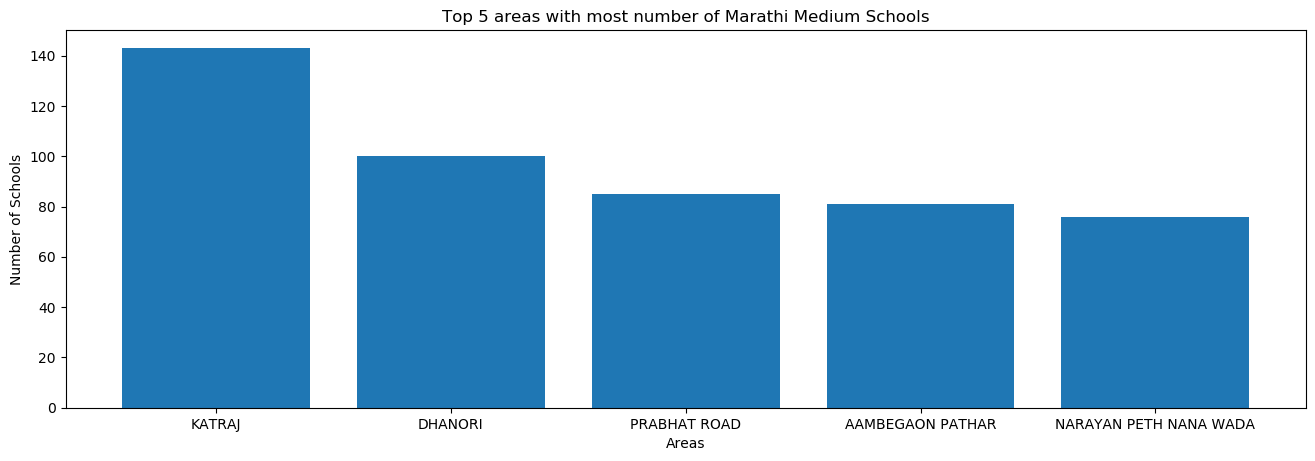

In [73]:
plt.figure(figsize=(16,5), dpi = 100)
plt.bar(top_df_marathi["Area"],top_df_marathi["no. of Schools"])
plt.title("Top 5 areas with most number of Marathi Medium Schools")
plt.xlabel("Areas")
plt.ylabel("Number of Schools")
plt.savefig('Marathi_schools.png')

---

In [48]:
tamil_schools = grouped.get_group(5)
df_tamil = tamil_schools["Area"].value_counts()
df_tamil = df_tamil.to_frame().reset_index().rename(columns={"Area":"no. of Schools","index":"Area"})

In [49]:
df_tamil

,Area,no. of Schools
0,K.E.M. HOSPITAL,5


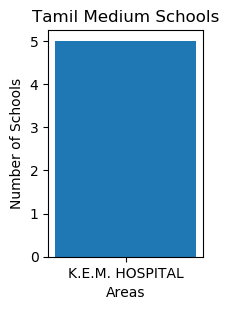

In [77]:
plt.figure(figsize=(2,3), dpi = 100)
plt.bar(df_tamil["Area"],df_tamil["no. of Schools"])
plt.title("Tamil Medium Schools")
plt.xlabel("Areas")
plt.ylabel("Number of Schools")
plt.savefig('tamil_schools.png')

---

In [50]:
urdu_schools = grouped.get_group(6)
df_urdu = urdu_schools["Area"].value_counts()
df_urdu = df_urdu.to_frame().reset_index().rename(columns={"Area":"no. of Schools","index":"Area"})

In [78]:
top_df_urdu = df_urdu.head()

---

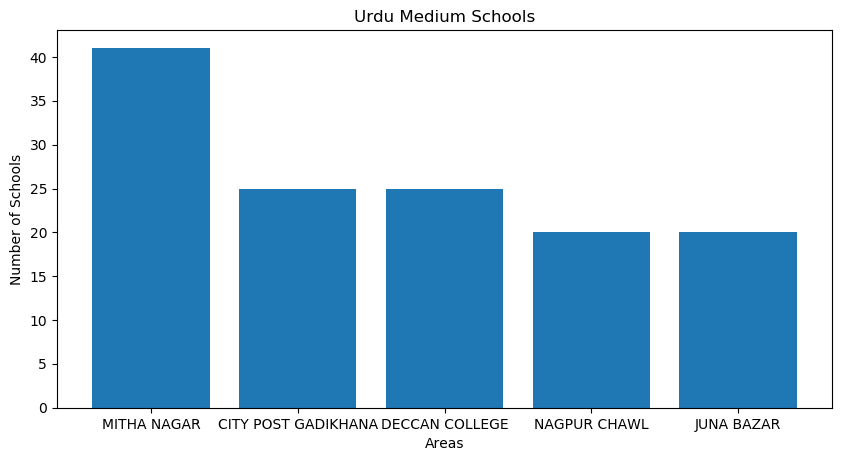

In [81]:
plt.figure(figsize=(10,5), dpi = 100)
plt.bar(top_df_urdu["Area"],top_df_urdu["no. of Schools"])
plt.title("Urdu Medium Schools")
plt.xlabel("Areas")
plt.ylabel("Number of Schools")
plt.savefig('urdu_schools.png')